In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import date, timedelta

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Find end date
end_date = session.query(func.max(Measurement.date)).all()[0][0]

#find beginning date
beg_year = int(end_date[0:4]) - 1
str_year = str(beg_year)
beg_date = end_date.replace(end_date[0:4],str_year)

prec_data = session.query(Measurement.date,Measurement.prcp).\
       filter(Measurement.date <= end_date).\
       filter(Measurement.date > beg_date).\
       order_by(Measurement.date).\
       all()
       
results = pd.DataFrame(prec_data, columns = ["Date", "Precipitation"])
results.set_index("Date", inplace = True)
results.sort_values(by="Date",ascending=False) 
print(results)
#print(station_data)

            Precipitation
Date                     
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.22
...                   ...
2017-08-22           0.50
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2223 rows x 1 columns]


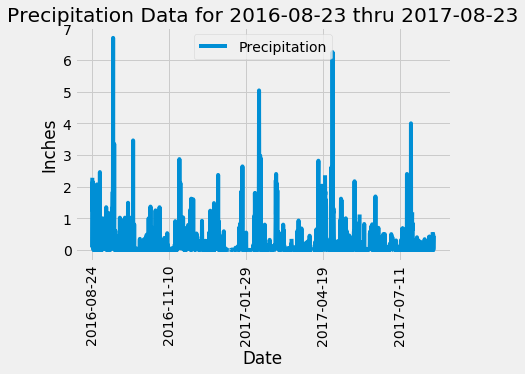

In [12]:
# Plot the results
results.plot(kind='line',rot=90,legend=True)
plt.title(f'Precipitation Data for {beg_date} thru {end_date}')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.savefig('Output/Prec_Data.png')
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).distinct().count()

9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_list = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = station_list[0][0]
print(most_active)

station_temp = session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
       filter(Measurement.station == most_active).\
       all()
station_results = pd.DataFrame(station_temp, columns = ["station","lowest_temp","highest_temp","avg_temp"])
station_results


USC00519281


,station,lowest_temp,highest_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(Measurement.station,Measurement.date,Measurement.tobs).\
       filter(Measurement.date <= end_date).\
       filter(Measurement.date >= beg_date).\
       filter(Measurement.station == most_active).\
       all()

station_temp_results = pd.DataFrame(station_data, columns = ["station","date","temperature"])    
station_temp_results
    


,station,date,temperature
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
...,...,...,...
347,USC00519281,2017-08-14,77.0
348,USC00519281,2017-08-15,77.0
349,USC00519281,2017-08-16,76.0
350,USC00519281,2017-08-17,76.0


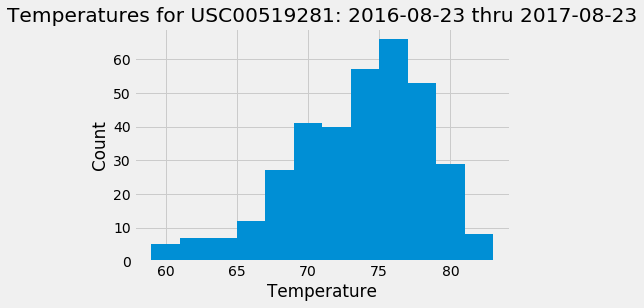

In [18]:
# plot the results as a histogram
plt.hist(station_temp_results['temperature'],bins =12)
plt.title(f'Temperatures for {most_active}: {beg_date} thru {end_date}')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('Output/Temps.png')
plt.show()


## Bonus Challenge Assignment

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Subtract 1 day from current beg date to get prior end date
p_day = int(beg_date[8:10])-1
str_day = str(p_day)
p_end_date = beg_date.replace(beg_date[8:10],str_day)

# Subtract 1 year from current beg date to get prior beg date
p_year = int(beg_date[0:4])-1
str_year = str(p_year)
p_beg_date = beg_date.replace(beg_date[0:4],str_year)

results = calc_temps(p_beg_date, p_end_date)
print(f'{p_beg_date} thru {p_end_date} data: {results}')



2015-08-23 thru 2016-08-22 data: [(56.0, 74.43918053777209, 86.0)]


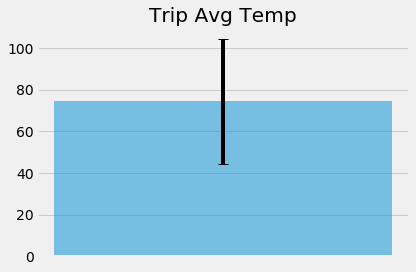

In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
title = "Trip Avg Temp"
error = results[0][2] - results[0][0]
plt.bar(0, results[0][1], yerr=error, align='center', alpha=0.5, ecolor='black', capsize=5)
plt.title(title)
plt.xticks([],[])
plt.tight_layout()
plt.savefig('Output/Trip_Temp.png')
plt.show()


In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
station_data = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= p_beg_date).\
    filter(Measurement.date <= p_end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()

results = pd.DataFrame(station_data, columns = ["station","station_name","latitude","longitude","elevation","precipitation"])
results


,station,station_name,latitude,longitude,elevation,precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,177.29
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,106.77
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,72.44
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,55.56
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,42.93
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,23.80
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,4.56
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,3.95
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.00


In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
